# Flare 2013/06/30



In [47]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')
import use_nessi as un
#

In [48]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection
import matplotlib.cm as cm


In [49]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

from astropy.io import fits as f
# And now the running commands
openfile="crispex_6563_09_15_50_time_corrected.fits"
# datacube6563=f.getdata(openfile)
header= f.getheader(un.get_file_path_fits(openfile))
print(header)
# np.savetxt('headerHa13.txt', header)

tseries = rs('tseries_6563_09_15_50_calib.sav')
tseries.keys(), tseries, np.shape(tseries['grid'])

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                   16 / array data type                                NAXIS   =                    5 / number of array dimensions                     NAXIS1  =                  964                                                  NAXIS2  =                  970                                                  NAXIS3  =                   33                                                  NAXIS4  =                    1                                                  NAXIS5  =                  504                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                     

(dict_keys(['tstep', 'clip', 'tile', 'scale', 'ang', 'shift', 'grid', 'time', 'date', 'wfiles', 'tmean', 'crop']),
 {'tstep': 25,
  'clip': array([12,  4,  2,  1], dtype='>i2'),
  'tile': array([ 6,  8,  8, 14], dtype='>i2'),
  'scale': 16.891891,
  'ang': array([ 0.0450829 ,  0.04491455,  0.04472284,  0.04441143,  0.04412924,
          0.04395316,  0.04378447,  0.04361573,  0.04344692,  0.04327774,
          0.04310884,  0.04293924,  0.04277072,  0.04260107,  0.04243212,
          0.04226263,  0.04209345,  0.04192411,  0.04175389,  0.04158461,
          0.0414147 ,  0.04124294,  0.04107252,  0.04090292,  0.0407329 ,
          0.04056295,  0.04039231,  0.04022157,  0.04005058,  0.03987953,
          0.03970897,  0.03953885,  0.03936804,  0.03919701,  0.03902642,
          0.03885461,  0.03868327,  0.03851245,  0.0383409 ,  0.03816843,
          0.03799642,  0.03782507,  0.03765316,  0.03748148,  0.03730876,
          0.03713695,  0.03696484,  0.03679304,  0.03662083,  0.03644914,
     

In [50]:
tseries['ang'][0], tseries['ang'][0]*60**2

(0.04508289962217571, 162.29843863983257)

 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


np.shape(self.datacube) (504, 1, 33, 970, 964)

(970, 964) (970, 964)
Boundary
Blue=Outside, yellow=Inside


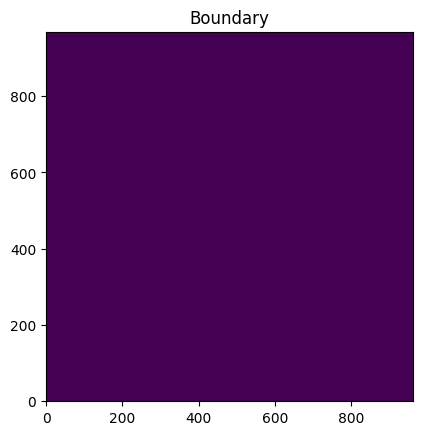

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


((504, 1, 33, 970, 964),
 array([[[10000, 10000, 11165,  9703],
         [ 9657,  9802,  9589, 11293]],
 
        [[ 8915,  8915,  9466,  9144],
         [ 8944,  8484,  8725,  9073]],
 
        [[ 5898,  5898,  5432,  6275],
         [ 6175,  5495,  4881,  6091]],
 
        [[ 4007,  4007,  2330,  3239],
         [ 2790,  2928,  2033,  3150]],
 
        [[ 4308,  4308,  2891,  3374],
         [ 2666,  3377,  2694,  3423]],
 
        [[ 7625,  7625,  7552,  7986],
         [ 6278,  6182,  7358,  7952]]], dtype='>i2'))

In [51]:
reload(un)
#  %matplotlib inline
Ha = un.SST_data(filename_fits='crispex_6563_09_15_50_time_corrected.fits',spectfilename='spectfile_6563.idlsave',
                 timesfilename='tseries_6563_09_15_50_calib.sav', name_of_line='Ha13', thresh=[1000, 50000], boundary_methode='No Boundary')

# Ha.datacube
np.shape(Ha.datacube), Ha.datacube[0,0,0:30:5,10:20:5, 100:200:30]


In [52]:
print(Ha._time[1], Ha._time[0], Ha._time[2], Ha._time[-1]) 
Ha.calculate__FOV_spect_over_time()

b'09:16:01.529' b'09:15:54.254' b'09:16:09.809' b'10:17:18.131'


In [53]:
np.max(Ha.datacube[0,0,:,:,:]), np.min(Ha.datacube[0,0,:,:,:])

(29596, 1775)

In [54]:
secs = un.get_TIME(Ha)*60
dt = secs[1:]-secs[:-1]
print(f"the mean cadence is {np.average(dt)} for this line!")

the mean cadence is 7.324055666003973 for this line!


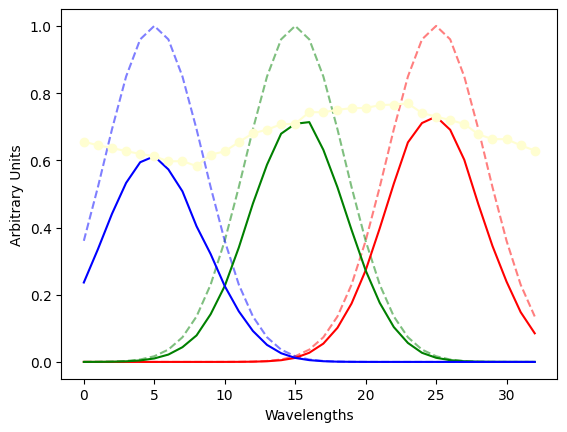

In [55]:
# %matplotlib inline
Ha.update_filters([[25,3.5], [15,3.5], [5,3.5]])
Ha.plot_filt(880,900)
plt.show()

In [56]:
# from cocoplot import RGB

# data_float = RGB(datacube, filter = Ha._filt, threshold=Ha._thresh, thresmethod='percentile')
# data_int = norm(data_float)
# np.uint8(np.round(data*255./np.max(data)))

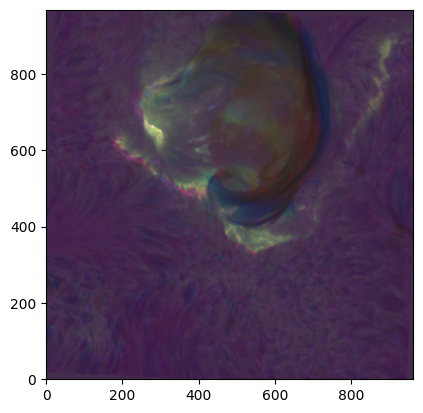

(970, 964, 3)


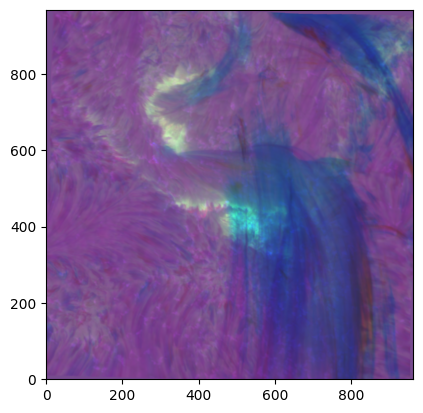

(970, 964, 3)


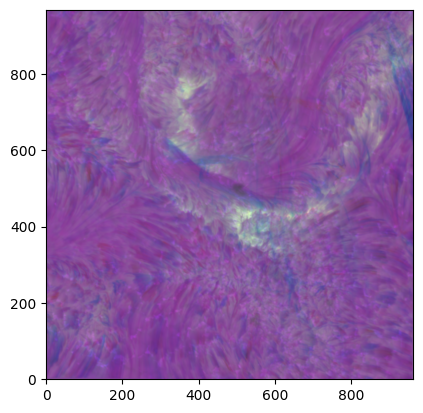

(970, 964, 3)


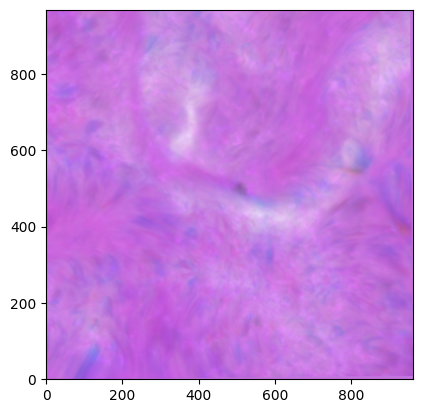

(970, 964, 3)


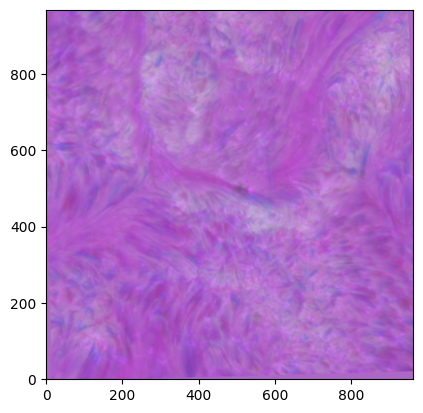

(970, 964, 3)


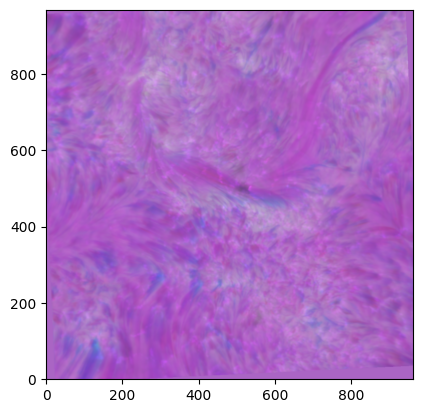

(970, 964, 3)


In [57]:
# %matplotlib widget
for frame in range(0,Ha._number_of_frames, 100):
    # frame=0
    Ha.ccp_frame(frame,Show=False)
    plt.imshow(Ha.current_ccp, origin='lower')

    # plt.imshow(Ha.boundary, origin='lower', alpha=0.2)
    plt.show()
    print(np.shape(Ha.current_ccp))#,np.shape(Ha.boundary))

In [58]:
Ha.boundary

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

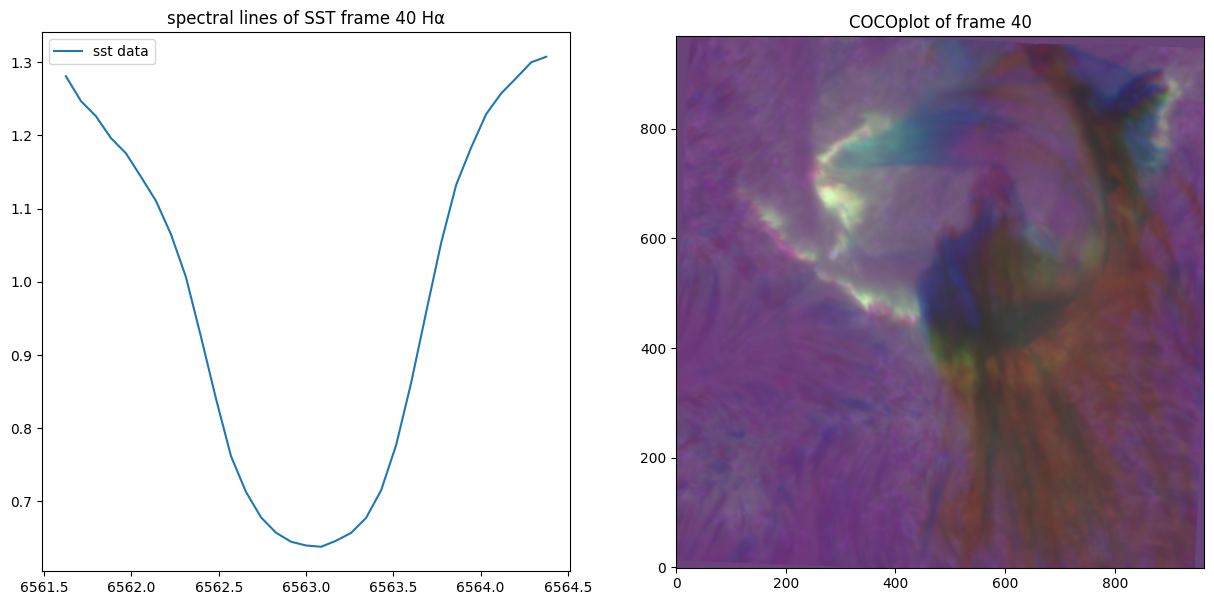

In [59]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
Ha.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
Ha.frame_integrated_spect(frame)
ax[0].plot(Ha._wavel, Ha.av_spect, label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(Ha.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

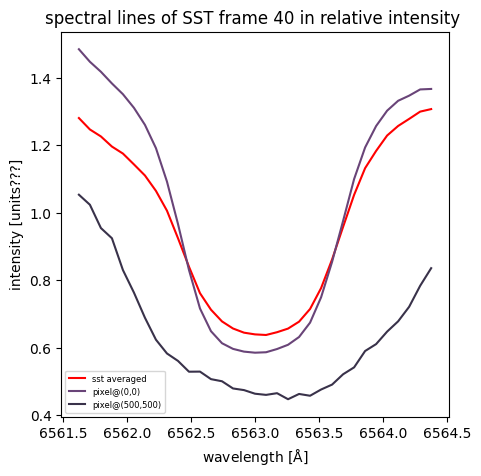

In [60]:
Ha.current_ccp[0:30:10,0:60:20,:]
Ha.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

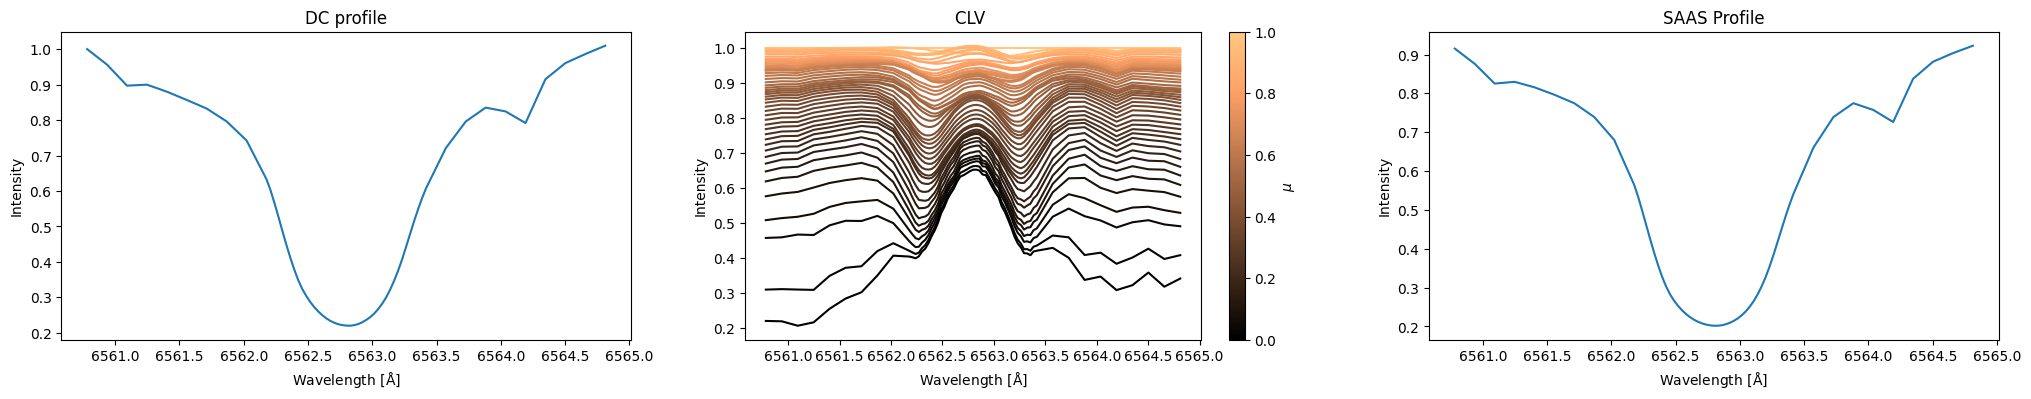

6562.797056366136 6562.797056366135


In [61]:
import use_nessi3 as un3
theor_Ha = un3.linestudier('E:/solar flares/data/2017-09-06/fits/6563_clv.fits', atlas=None, nr=101)
print(np.median(theor_Ha.sst_wav), np.mean(theor_Ha.sst_wav))

## Calculating the $\mu$ !!!!! 

FOV centered around $(323.4'',  -287.9'')$ which gives a $\mu = \sqrt{1- (323.4''^2  +-287.9''^2 ) / 959.63''^2 } = 0.892 $

Here is the field of $55 \times 55 $ as said in the paper.  

In [62]:
position = (323.4, -287.9)
mu = (1-(323.4**2+287.9**2)/959.6**2)**0.5
mu

0.892416998354795

In [63]:
np.shape(Ha.datacube), 

((504, 1, 33, 970, 964),)

In [64]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s

with f.open(Ha.filename) as io:
    for i, hdu in enumerate(io):
        print(f"HDU {i+1}:")
        print(add_enters(str(hdu.header), length_row=79))

# there is no coordinate information present! We take the mu from Beam electrons as a source of H&alpha; flare ribbons

HDU 1:
SIMPLE  =                    T / conforms to FITS standard                     
 BITPIX  =                   16 / array data type                               
 NAXIS   =                    5 / number of array dimensions                    
 NAXIS1  =                  964                                                 
 NAXIS2  =                  970                                                 
 NAXIS3  =                   33                                                 
 NAXIS4  =                    1                                                 
 NAXIS5  =                  504                                                 
 EXTEND  =                    T                                                 
 END                                                                            
                                                                                
                                                                                
                      

[295.9, 350.9, -315.4, -260.4]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.8920773325656376 for timeframe 0
succesfully saved.
(504, 1, 33, 970, 964)


(array([0.9], dtype='>f8'),
 array([0.99157248, 0.99149193, 0.99018695, 0.99331628, 0.99444376,
        0.99524507, 0.99527623, 0.99481439, 0.99094226, 0.98408839,
        0.98167604, 0.98072221, 0.97956433, 0.97962434, 0.97891868,
        0.9786389 , 0.9795572 , 0.98099992, 0.98216162, 0.98490032,
        0.98725867, 0.9891162 , 0.9917713 , 0.99392459, 0.99593377,
        0.9971142 , 0.99849794, 0.99952931, 1.00014165, 0.99991551,
        0.99962912, 0.99880013, 0.99721366, 0.99431348, 0.99146642,
        0.98859107, 0.98488288, 0.98234468, 0.97828998, 0.97577196,
        0.97278317, 0.970265  , 0.96847789, 0.96779221, 0.96810537,
        0.96940729, 0.97165064, 0.97336261, 0.97553746, 0.97797631,
        0.98805461, 0.99392255, 0.99471274, 0.98987457, 0.98185614,
        0.99075983, 0.99133806, 0.99183207, 0.9901033 ], dtype='>f8'),
 array([0.98983266, 0.98997514, 0.98849477, 0.99195593, 0.99301906,
        0.99393069, 0.99403658, 0.99340487, 0.98898638, 0.98085174,
        0.9778490

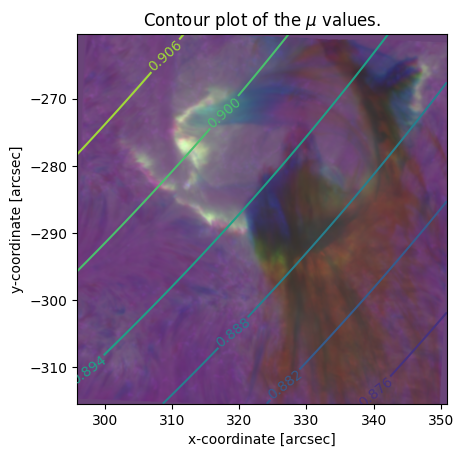

In [65]:
def calculate_mu(x,y, radius=959.63):
    '''
    Calculates mu given x,y in arseconds the radius of the celestial object is option. 
    The value of the sun is 959.63 arcsec

    mu is the cos(theta) where theta is the angel between the zenit and the line of site of 
    a spot at the celestial objec.
    x,y are coordinates in arcsec (or any relative unit compared to the radius) from the middle
    of the celestial object.
    '''
    mu  = (1-(x**2 + y**2)/radius**2)**0.5
    return mu

width = 55

fxp = [position[0] - width / 2, position[0] + width / 2 ]
fyp = [position[1] - width / 2, position[1] + width / 2 ]
fxp.extend(fyp)
print(fxp)

x = np.linspace(fxp[0], fxp[1], np.shape(Ha.datacube)[4])
y = np.linspace(fyp[0], fyp[1], np.shape(Ha.datacube)[3])

X, Y = np.meshgrid(x, y)

MU = calculate_mu(X,Y)


reload(un)

def set_mu(sst_data, mu):
    sst_data.mu = mu

def fix_mu_theor(mu, theor_line):
    x = np.abs(theor_line.sst_mu-mu)
    index_mu = np.where(x == np.min(x))[0]
    theor_line.index_mu = index_mu
    theor_line.best_fit_clv = clv_fit(mu, theor_line)


def clv_fit(mu, theor_line):
    return np.apply_along_axis(lambda arr: interp1d(theor_line.sst_mu, arr)(mu), axis=0, arr=theor_line.sst_clv)


def give_mu_contourplot(MU, X, Y, extent, timeFrame=0, over=None, save=False, save_name=""):
    '''
    Creates a contourplot of the mu values
    if over is not None but a sst_data class object then the countour plot is shown over the specific frame
    '''
    if over is not None:
        shape=np.shape(over.datacube)[3:5]

    fig, ax = plt.subplots()
    if over is not None:
        over.xx, over.yy = X, Y
        over.frame_integrated_spect(timeFrame)
        ax.imshow(Image.fromarray(over.current_ccp), origin='lower', extent=extent)
        av_mu = np.average(MU, weights=over.boundary)
        print(r'AVERAGE MU: The average $\mu$ wheigthed over the field of view is', av_mu, 'for timeframe', timeFrame)
    CS = ax.contour(X, Y, MU)
    ax.clabel(CS, inline=True, fontsize=10)
    ax.set_title(r'Contour plot of the $\mu$ values.')
    ax.set_xlabel('x-coordinate [arcsec]')
    ax.set_ylabel('y-coordinate [arcsec]')

        
    if save:
        # Save arrays together
        np.savez(f"line_data/contourdata{save_name}.npz", MU, X[0], Y[:,0], over.current_ccp)
        print("succesfully saved.")
        
    if over is not None:
        return av_mu
    
# un.give_mu_contourplot(Ha.filename, timeFrame=0, over=None, shift=(0,0), save=False, save_name=Ha.name_of_line)

mu = give_mu_contourplot(MU, X, Y, fxp, over=Ha, save=True, save_name=Ha.name_of_line)
print(np.shape(Ha.datacube))
sst_data = Ha
theor_line = theor_Ha
set_mu(Ha, mu)
# Ha.set_mu(theor_line=theor_Ha, number_of_last_frame=190)
# mu = CaII.set_mu(theor_line=theor_CaII, number_of_last_frame=170)
fix_mu_theor(mu, theor_line)
theor_line.sst_mu[theor_Ha.index_mu], theor_line.sst_clv[theor_Ha.index_mu][0], clv_fit(mu, theor_line)


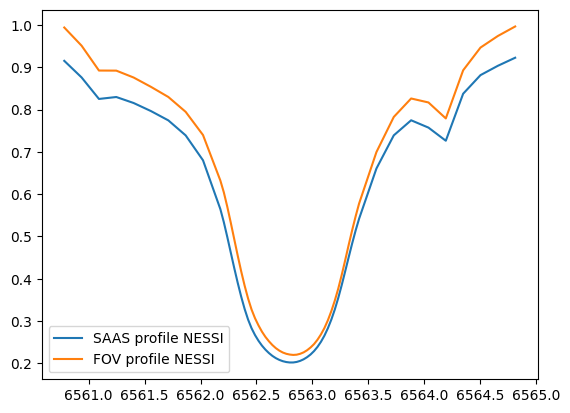

In [66]:
theor_Ha.set_fov( sst_data.xx, sst_data.yy, Ha.boundary, sr=959.63)

## Finding a suitable quiet sun patch

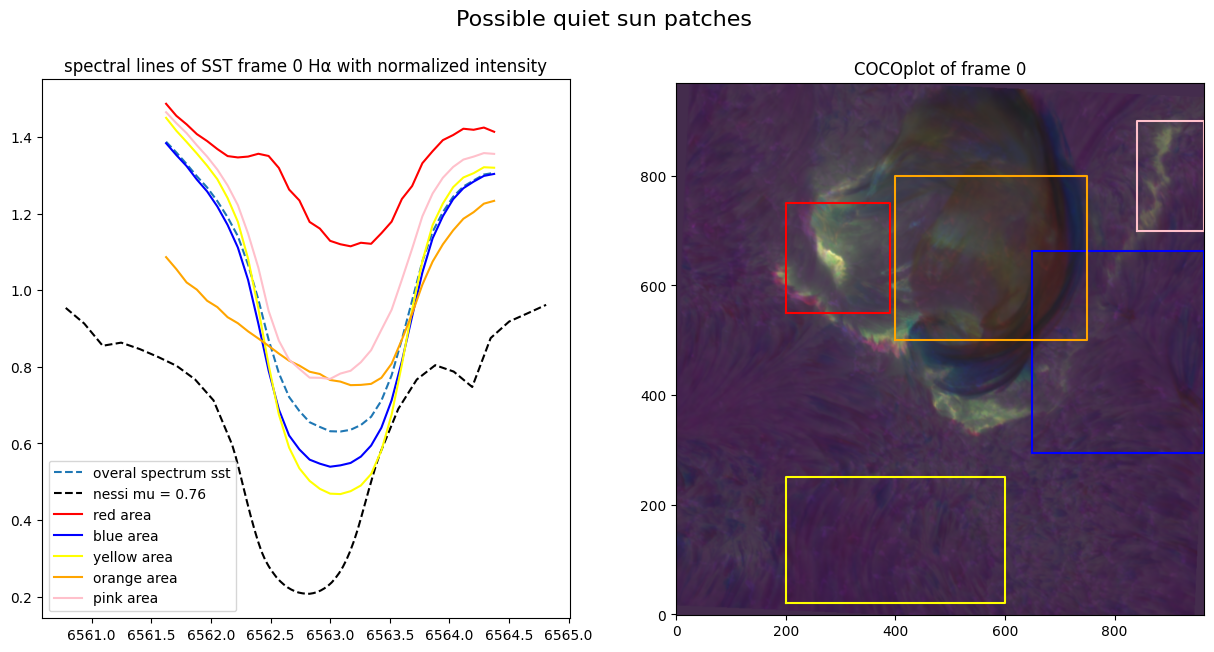

In [67]:
X = [[(200,390), (550,750)], [(650,963), (294,662)],[(200,600), (20,250)],[(400,750), (500,800)], [(840, 963), (700, 900)]]

frame = 0

Ha.possible_quiet_sun_patches(frame, theor_Ha , X=X)

### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [68]:
color_wanted_patch = 'yellow'

the edges of the patch are denoted by the xlim: (200, 600) and ylim: (20, 250)


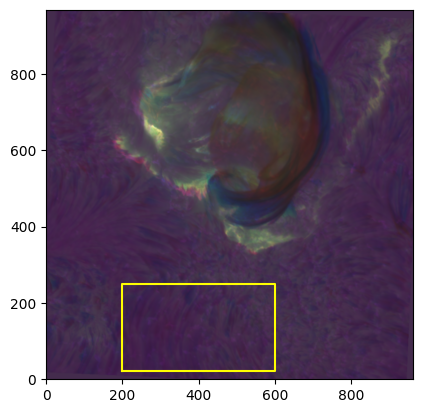

The quiet sun is pick at x (318.7167185877466, -307.7658410732714) with average              mu 0.8870379996947695


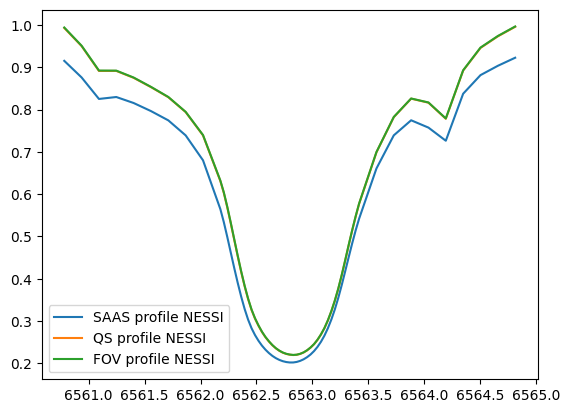

{'frame': 0, 'xlim': (200, 600), 'ylim': (20, 250), 'color': 'yellow'}

In [69]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = int(colors.index(color_wanted_patch))

xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

Ha.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)

theor_Ha.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
Ha.quiet_sun

[6561.62399995 6561.70999992 6561.79599988 6561.88199997 6561.96799994
 6562.05399996 6562.13999999 6562.22599995 6562.31199998 6562.39799994
 6562.48399997 6562.56999999 6562.65599999 6562.74199998 6562.82799999
 6562.914      6563.         6563.086      6563.17200001 6563.25800002
 6563.34400001 6563.43000001 6563.51600003 6563.60200006 6563.68800002
 6563.77400005 6563.86000001 6563.94600004 6564.03200006 6564.11800003
 6564.20400012 6564.29000008 6564.37600005] [1.45015994 1.41637861 1.3871988  1.35696715 1.32517982 1.2897965
 1.24066804 1.17877236 1.08193563 0.95176568 0.80527302 0.6754228
 0.58897776 0.53486958 0.50208696 0.48129063 0.46879353 0.46762717
 0.47523094 0.49008295 0.51998105 0.58120867 0.67511426 0.80569806
 0.94916786 1.07587782 1.17010439 1.22643878 1.26899183 1.29440008
 1.30563343 1.32110946 1.31985542] [0.84275773 0.82953841 0.8101546  0.78870436 0.7581465  0.71668642
 0.65677717 0.58296546 0.47837328 0.3782109  0.30741725 0.26553695
 0.23926786 0.22442001 0.219

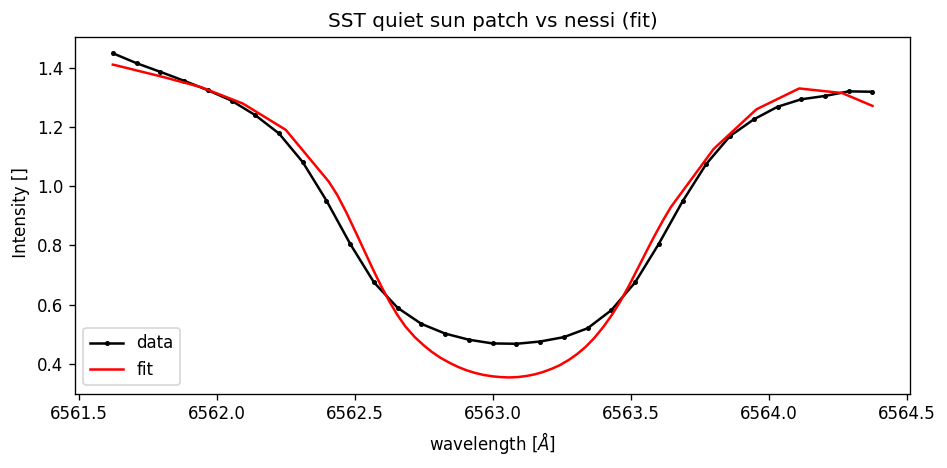

de p-waarde is  1.0 
Chi^2 reduced= 0.0045556195965385255 
aantal vrijheidgraden= 31 
chi^2= 0.1412242074926943
we behouden de fit tot op een betrouwbaarheidsniveau van  1.0 
Oftewel verwerp als p-waarde <lpha-niveau 


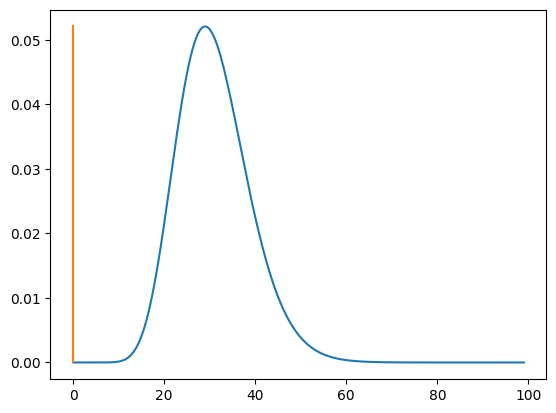

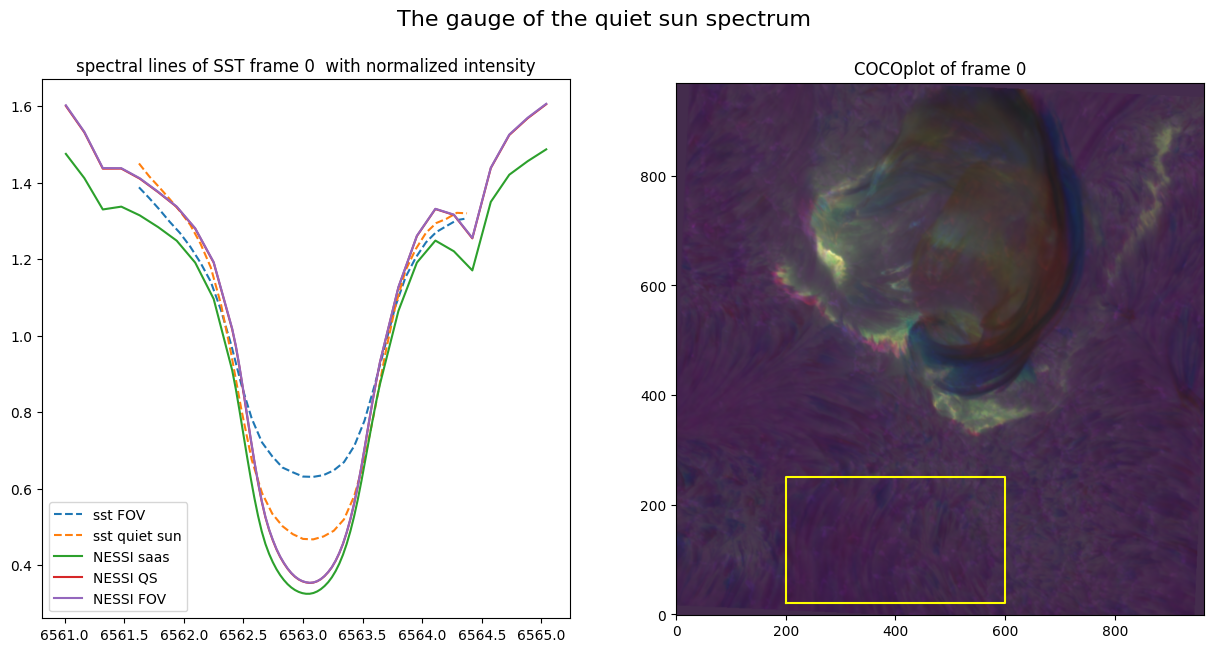

In [70]:
reload(un3)
un3.fit_qs_to_NESSI(theor_Ha, Ha)

Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [71]:
sst_data = Ha
np.shape(sst_data.datacube)

(504, 1, 33, 970, 964)

In [72]:
sst_data.calculate__FOV_spect_over_time()

In [73]:
sst_data.quiet_sun

{'frame': 0, 'xlim': (200, 600), 'ylim': (20, 250), 'color': 'yellow'}

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [16] at time t=[b'09:18:02 UT.
The areafactor for THis flare is 0.001045605534651025 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 84.03%.


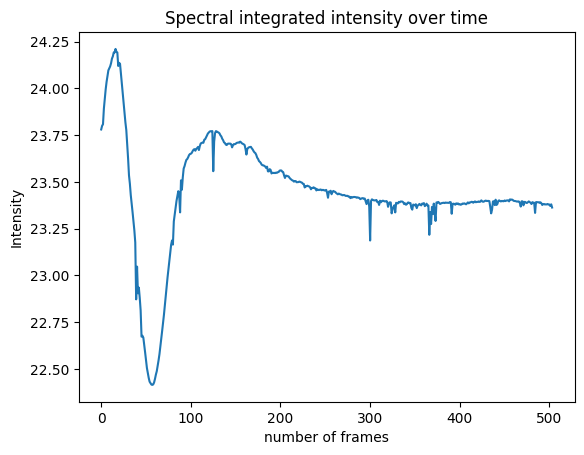

In [74]:
un.save_for_further_analysis(Ha, theor_Ha)
